<a href="https://colab.research.google.com/github/masags17/Python/blob/main/RegresionLineal_Luis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Descripción general de los datos:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  8

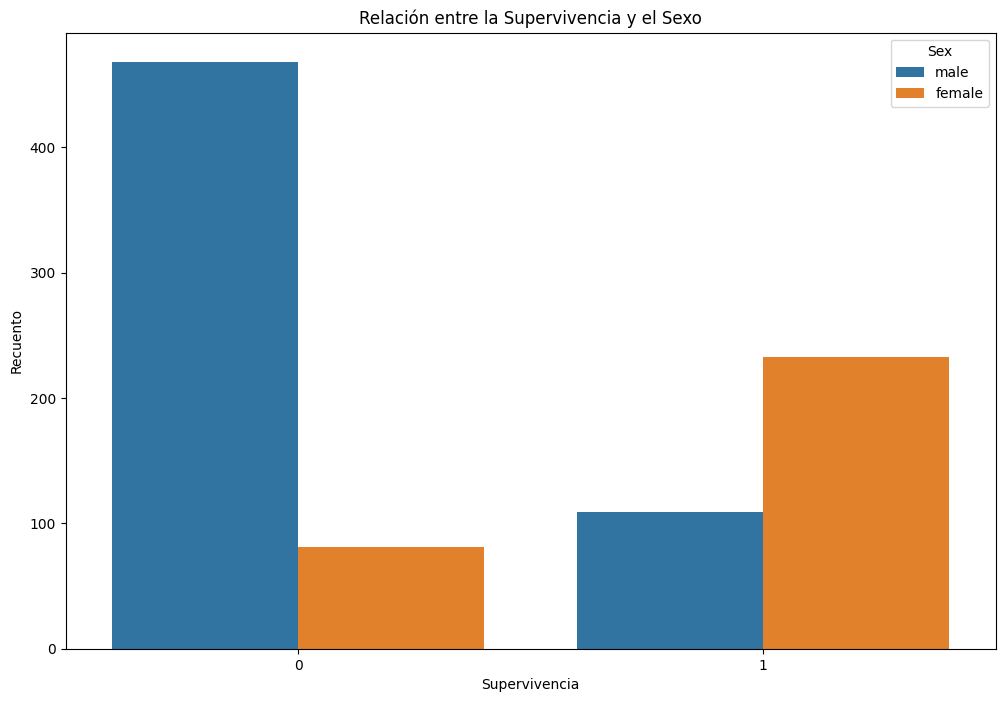


Regresión Logística:
Mejores parámetros: {'C': 0.1, 'penalty': 'l2'}
Precisión: 0.7794117647058824
Sensibilidad: 0.7162162162162162
Puntuación F1: 0.7464788732394366


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

In [2]:
# Montar Google Drive y configurar el directorio de trabajo
from google.colab import drive
drive.mount('/content/drive')


# Cambiar al directorio que contiene los conjuntos de datos
import os
os.chdir("/content/drive/MyDrive/DATASET/")

# Instalar las bibliotecas necesarias
!pip install --upgrade scikit-learn

# Importar las bibliotecas requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Cargar el conjunto de datos del Titanic
data = pd.read_csv('Titanic-Dataset.csv')

# Análisis exploratorio de datos
print("Descripción general de los datos:")
print(data.describe())

print("\nInformación sobre los datos:")
print(data.info())

print("\nVerificación de valores faltantes:")
print(data.isnull().sum())

# Visualizaciones y análisis adicionales
plt.figure(figsize=(12, 8))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.xlabel('Supervivencia')
plt.ylabel('Recuento')
plt.title('Relación entre la Supervivencia y el Sexo')
plt.show()

# Preprocesamiento de datos
# Eliminar columnas innecesarias
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Codificar las variables categóricas
codificador = LabelEncoder()
data.loc[:, 'Sex'] = codificador.fit_transform(data['Sex'])
data.loc[:, 'Embarked'] = codificador.fit_transform(data['Embarked'].astype(str))

# Imputar valores faltantes
imputador = SimpleImputer(strategy='mean')
data_imputada = imputador.fit_transform(data)
data_imputada = pd.DataFrame(data_imputada, columns=data.columns)

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data_imputada.drop('Survived', axis=1)
y = data_imputada['Survived']

# Dividir el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train)
X_test_escalado = escalador.transform(X_test)

# Regresión Logística
reg_logistica = LogisticRegression()
params_reg_logistica = {'penalty': ['l2', 'none'], 'C': [0.1, 1, 10]}
busqueda_reg_logistica = GridSearchCV(reg_logistica, params_reg_logistica, cv=5)
busqueda_reg_logistica.fit(X_train_escalado, y_train)
mejor_reg_logistica = busqueda_reg_logistica.best_estimator_
y_pred_reg_logistica = mejor_reg_logistica.predict(X_test_escalado)
precision_reg_logistica = accuracy_score(y_test, y_pred_reg_logistica)
precision_reg_logistica = precision_score(y_test, y_pred_reg_logistica)
sensibilidad_reg_logistica = recall_score(y_test, y_pred_reg_logistica)
puntuacion_f1_reg_logistica = f1_score(y_test, y_pred_reg_logistica)
print("\nRegresión Logística:")
print("Mejores parámetros:", busqueda_reg_logistica.best_params_)
print("Precisión:", precision_reg_logistica)
print("Sensibilidad:", sensibilidad_reg_logistica)
print("Puntuación F1:", puntuacion_f1_reg_logistica)

